In [ ]:
!wget https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar

--2023-12-27 16:15:56--  https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar
Resolving n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)... 37.230.193.192
Connecting to n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)|37.230.193.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30476994560 (28G) [application/x-tar]
Saving to: ‘crowd.tar’

crowd.tar           100%[===================>]  28.38G  22.4MB/s    in 21m 54s 

2023-12-27 16:37:57 (22.1 MB/s) - ‘crowd.tar’ saved [30476994560/30476994560]



In [ ]:
import tarfile

tar_file_path = 'crowd.tar'

with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall()

print(f'Файл {tar_file_path} успешно разархивирован')

Файл crowd.tar успешно разархивирован


In [ ]:
!pip install noisereduce

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys

import librosa
import librosa.display

from sklearn.preprocessing import OneHotEncoder

from IPython.display import Audio
import noisereduce as nr

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import HubertForSequenceClassification, Wav2Vec2FeatureExtractor
import torchaudio
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import os

import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D, Reshape
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau
from keras.initializers import glorot_uniform

from IPython.display import Audio
import noisereduce as nr

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1. Загрузить датасет Dusha и сделать EDA анализ.**



ЗАГРУЗИЛИ ДАННЫЕ

In [ ]:
def load_data(path, columns_to_drop=['hash_id', 'source_id']):
    df = pd.read_json(path, lines=True).drop(columns=columns_to_drop)
    df['audio_path'] = df['audio_path']
    df = df[df['annotator_emo'] != 'other']
    #df = df[df['duration'] <= 5.0]
    return df

In [ ]:
crowd_train = load_data('/content/crowd_train/raw_crowd_train.jsonl')
crowd_test = load_data('/content/crowd_test/raw_crowd_test.jsonl')
podcast_train = load_data('/content/drive/MyDrive/podcast/podcast_train/raw_podcast_train.jsonl')
podcast_test = load_data('/content/drive/MyDrive/podcast/podcast_test/raw_podcast_test.jsonl')

In [ ]:
crowd_train.head()

,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo
0,wavs/475e76f77ac1ed7cabafca740b15b32a.wav,2.453000,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry
1,wavs/2f9438ef68395c70a8714dc373a49d11.wav,4.640000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral
2,wavs/9937036a9c0dba20eecbffddd00f2be2.wav,4.341750,neutral,2.0,858305a5450b7bd1288ba0053b1cd1c1,None,None
3,wavs/fb0ae78586a235018103acec22a80a8f.wav,3.900562,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,сколько стоит на керамбит,neutral
4,wavs/196dcf9e1aaac46c2aee45e7f6adfb92.wav,4.780000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,афина когда закончится эта телепередача,neutral


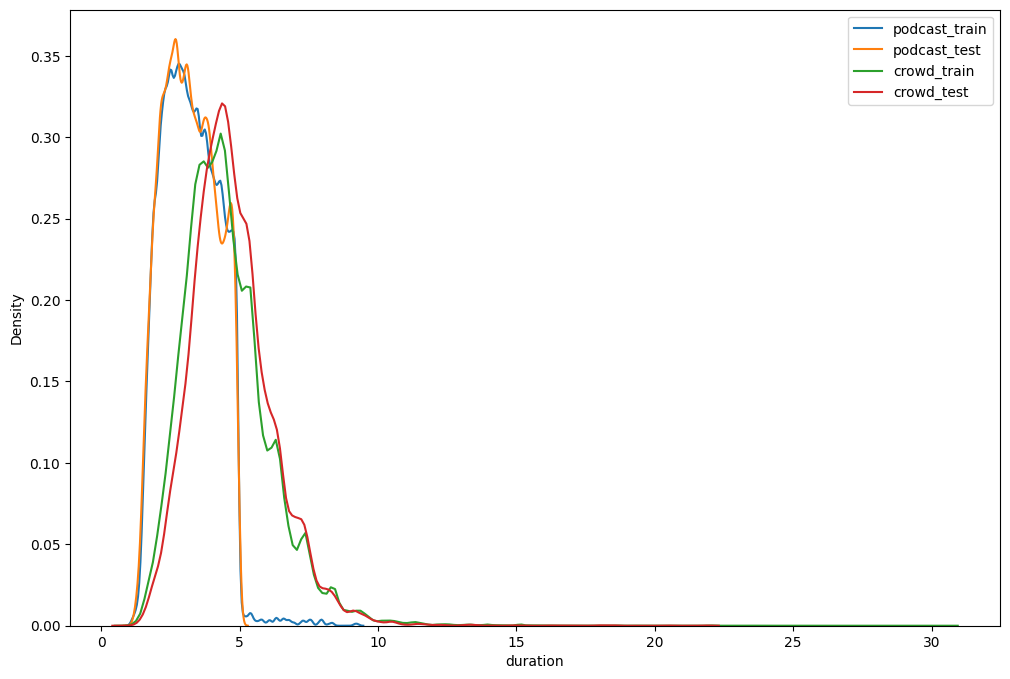

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(podcast_train['duration'], label='podcast_train')
sns.kdeplot(podcast_test['duration'], label='podcast_test')
sns.kdeplot(crowd_train['duration'], label='crowd_train')
sns.kdeplot(crowd_test['duration'], label='crowd_test')
plt.legend()

### **podcast_test + podcast_train**

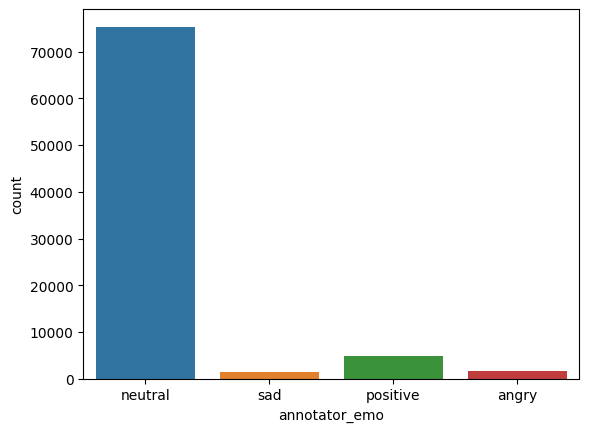

In [ ]:
order = ['neutral', 'sad', 'positive', 'angry']
sns.countplot(x='annotator_emo', data=podcast_test, order=order)
plt.show()

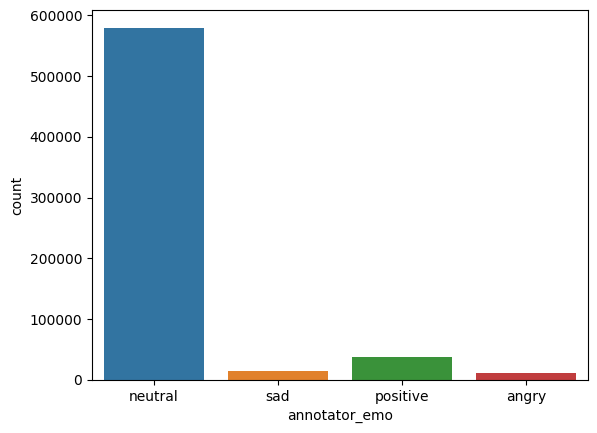

In [ ]:
order = ['neutral', 'sad', 'positive', 'angry']
sns.countplot(x='annotator_emo', data=podcast_train, order=order)
plt.show()

### **crowd_test + crowd_train**

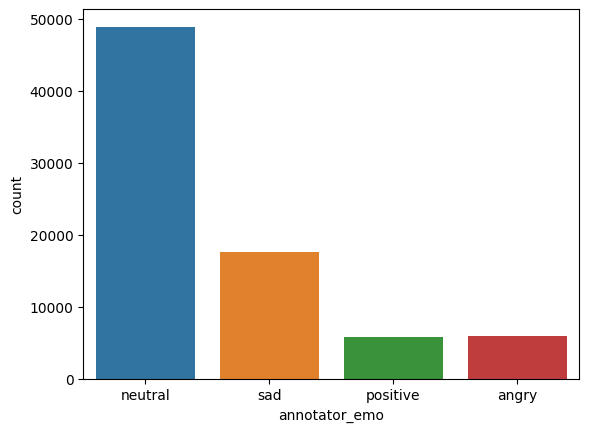

In [ ]:
order = ['neutral', 'sad', 'positive', 'angry']
sns.countplot(x='annotator_emo', data=crowd_test, order=order)
plt.show()

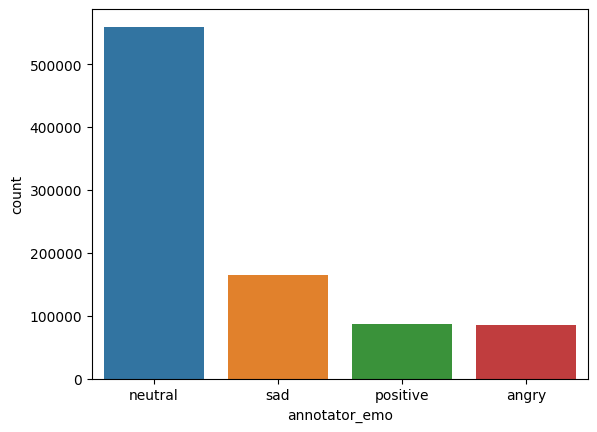

In [ ]:
order = ['neutral', 'sad', 'positive', 'angry']
sns.countplot(x='annotator_emo', data=crowd_train, order=order)
plt.show()

Посмотрите содержимое каждого из классов и выведите график "Mean MFCC на Podcast, без предобработки" по всем классам

Я вывела графики для crowd, потому что у podcast выдавал ошибку, он не видит файлы, хотя путь указан правильно и почему-то он обращается к тем файлам, которых у меня реально в папке нет и не должно быть.

### **График MFCC (Mel-Frequency Cepstral Coefficients)** представляет собой визуализацию коэффициентов мел-частотных кепстральных коэффициентов, которые являются признаками, извлеченными из аудиосигнала. Эти коэффициенты широко используются в области обработки речи и аудиоаналитики.

Вот краткое объяснение ключевых понятий:

  **Mel-Frequency Cepstral Coefficients**(MFCCs): Это коэффициенты, представляющие форму спектра мощности аудиосигнала после применения ряда преобразований. Эти коэффициенты обычно используются для представления спектральных характеристик звука в человекоподобной форме.

  **Mel-Frequency**: Это шкала частот, разработанная с учетом восприятия человеческим ухом. Она более линейна на низких частотах и более логарифмическая на высоких.

График MFCC визуализирует эти коэффициенты на оси времени. Обычно по горизонтальной оси отображается время, а по вертикальной — номер MFCC. График может предоставить информацию о том, какие частоты и какие изменения в аудиосигнале имеют значение для данной аудиозаписи.

MFCCs часто используются в задачах распознавания речи, их анализа и классификации аудио. Они предоставляют компактное представление спектральных характеристик звука, что делает их удобными для использования в алгоритмах машинного обучения.

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(np.linspace(0, len(data) / sr, len(data)), data)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar()

def create_mfcc(data, sr, e):
    plt.figure(figsize=(11, 3))
    mfcc = librosa.feature.mfcc(y=data, sr=sr, hop_length = 512, n_mfcc=13)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()
    plt.show()
    plt.plot(np.mean(mfcc.T, axis=0))
    plt.show()
    return mfcc

In [ ]:
crowd_train['audio_path'] = crowd_train['audio_path'].apply(lambda x: '/content/crowd_train/' + x)
crowd_test['audio_path'] = crowd_test['audio_path'].apply(lambda x: '/content/crowd_test' + x)
podcast_train['audio_path'] = podcast_train['audio_path'].apply(lambda x: '/content/drive/MyDrive/podcast/podcast_train/' + x)
podcast_test['audio_path'] = podcast_test['audio_path'].apply(lambda x: '/content/drive/MyDrive/podcast/podcast_test/' + x)

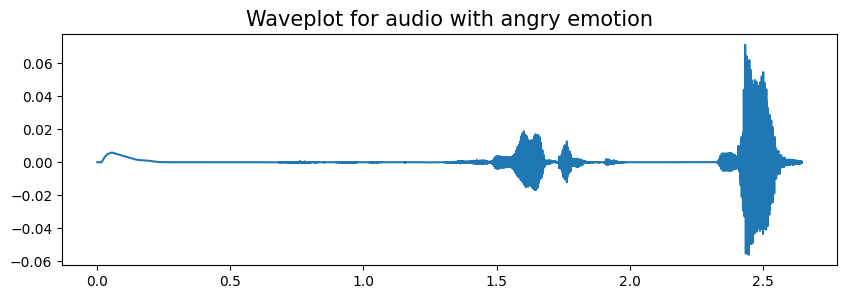

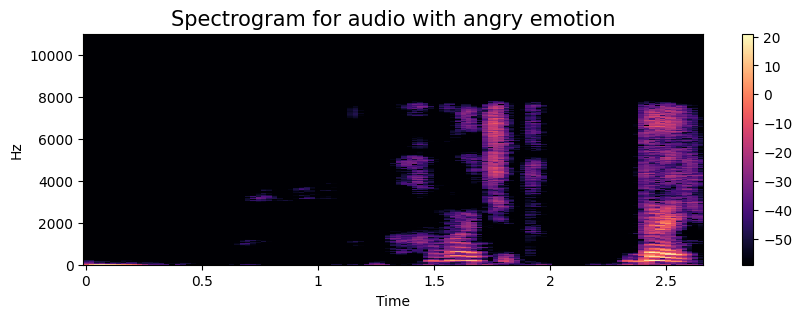

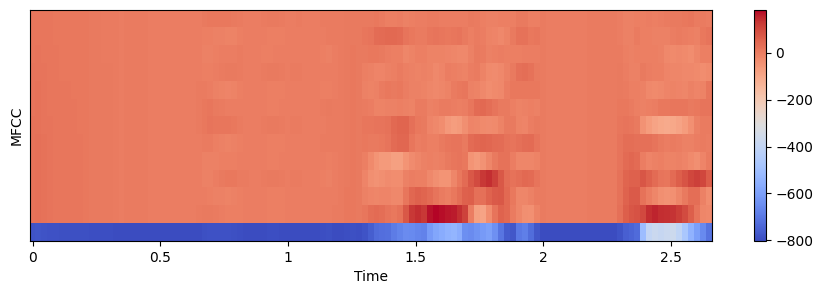

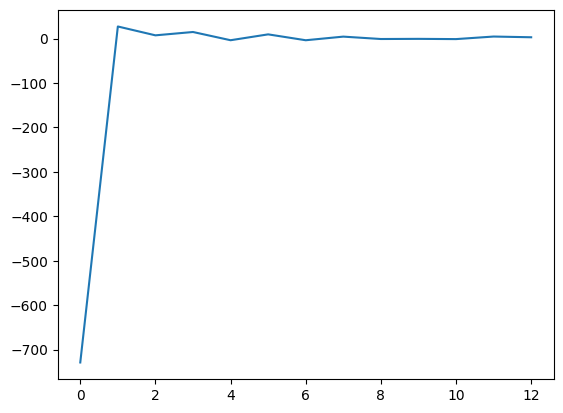

In [ ]:
emo = 'angry'
path = crowd_train[crowd_train['annotator_emo'] == emo]['audio_path'].iloc[3]
data, sr = librosa.load(path)
data = nr.reduce_noise(data, sr=sr)
xt, index = librosa.effects.trim(data, top_db=33)
display(Audio(xt, rate=sr))
create_waveplot(xt, sr, emo)
create_spectrogram(xt, sr, emo)
mfcc_p = create_mfcc(xt, sr, emo)

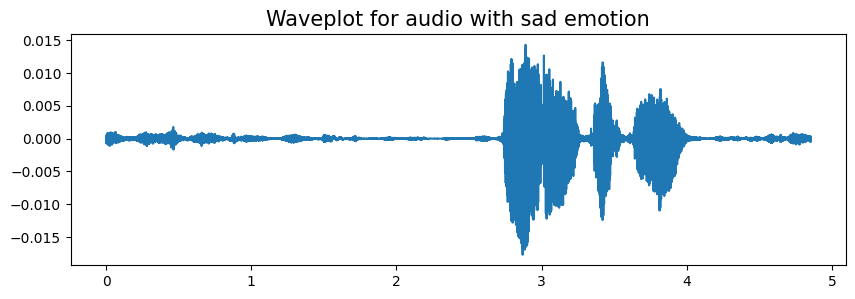

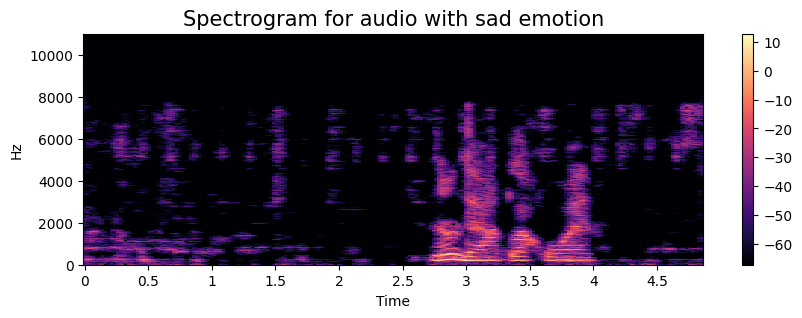

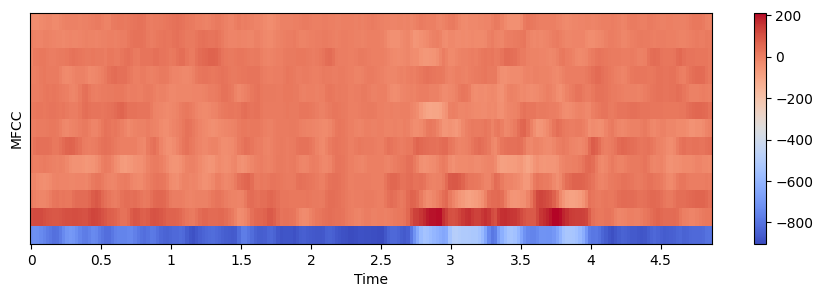

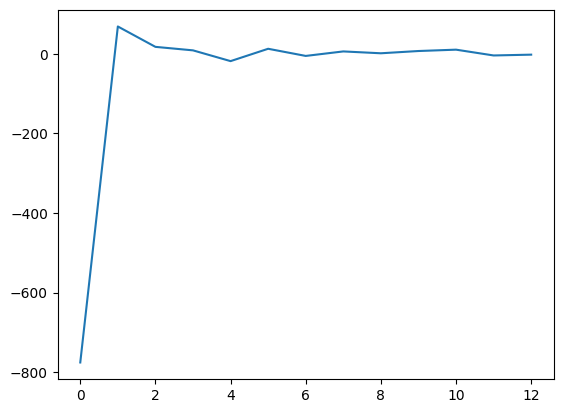

In [ ]:
emo = 'sad'
path = crowd_train[crowd_train['annotator_emo'] == emo]['audio_path'].iloc[3]
data, sr = librosa.load(path)
data = nr.reduce_noise(data, sr=sr)
xt, index = librosa.effects.trim(data, top_db=33)
display(Audio(xt, rate=sr))
create_waveplot(xt, sr, emo)
create_spectrogram(xt, sr, emo)
mfcc_p = create_mfcc(xt, sr, emo)

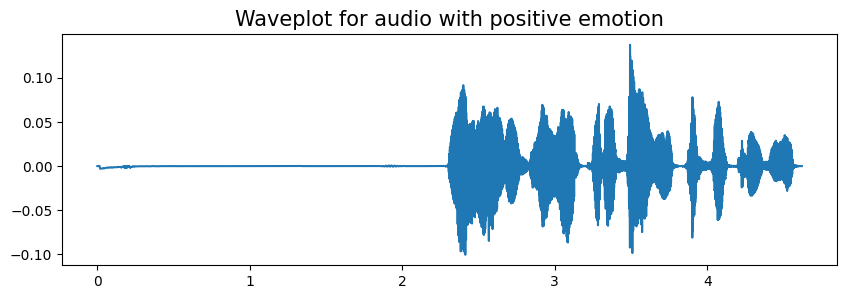

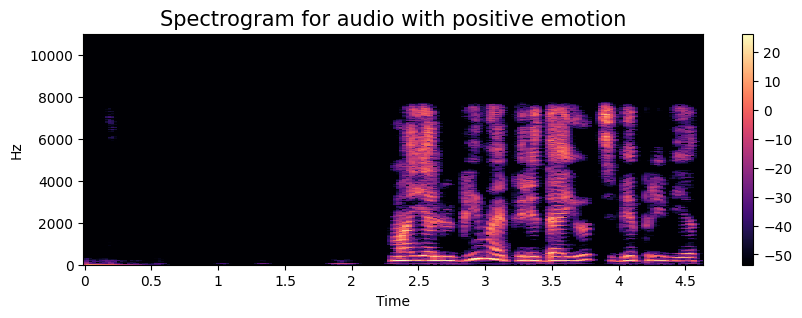

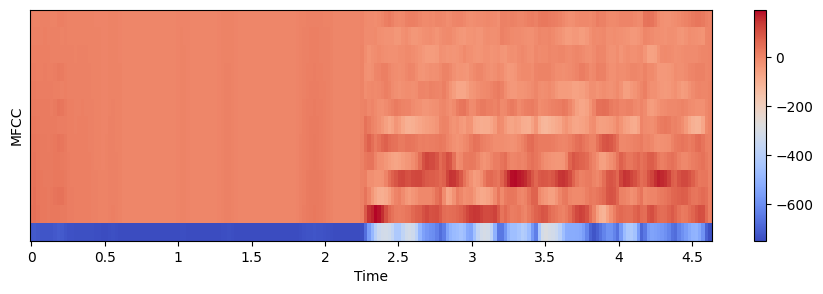

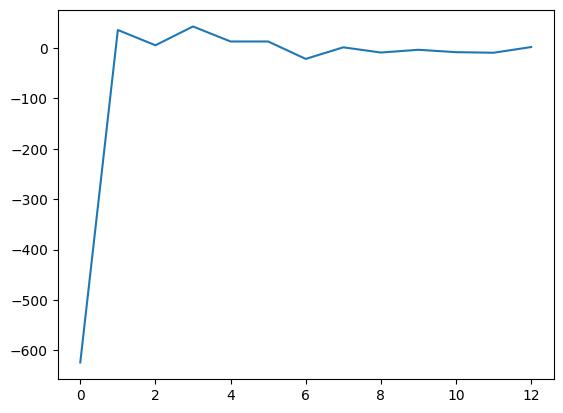

In [ ]:
emo = 'positive'
path = crowd_train[crowd_train['annotator_emo'] == emo]['audio_path'].iloc[0]
data, sr = librosa.load(path)
data = nr.reduce_noise(data, sr=sr)
xt, index = librosa.effects.trim(data, top_db=33)
display(Audio(xt, rate=sr))
create_waveplot(xt, sr, emo)
create_spectrogram(xt, sr, emo)
mfcc_p = create_mfcc(xt, sr, emo)

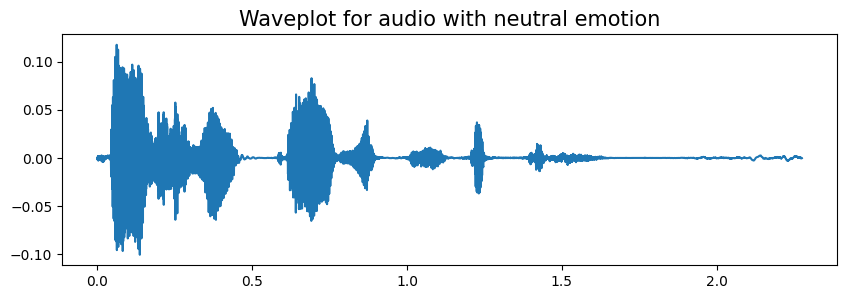

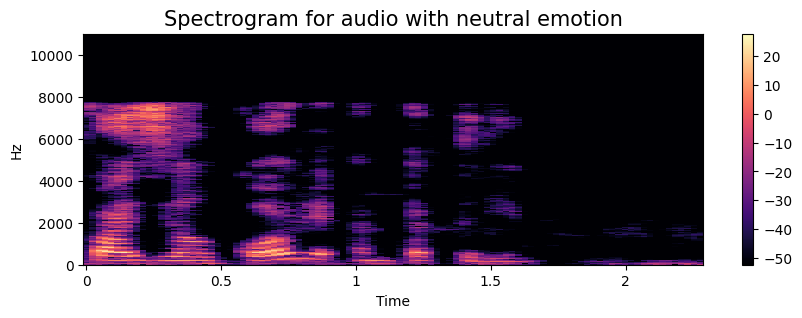

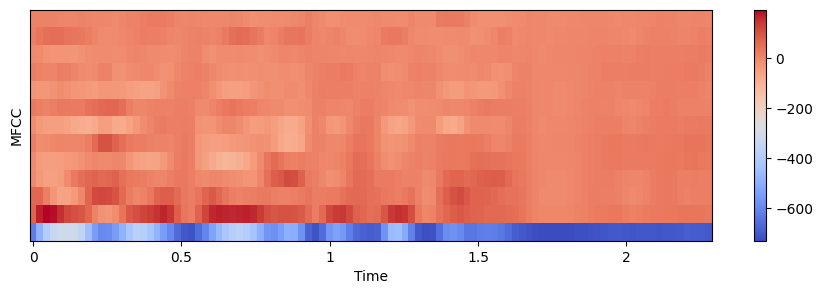

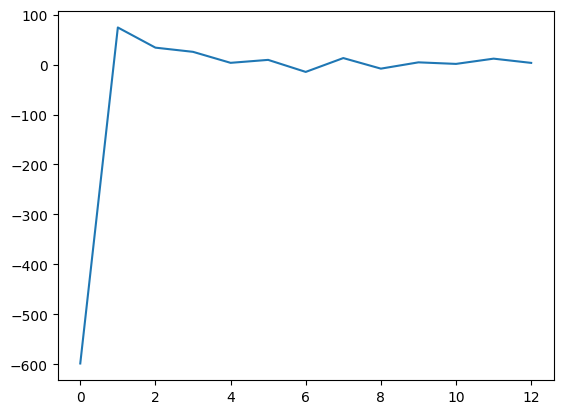

In [ ]:
emo = 'neutral'
path = crowd_train[crowd_train['annotator_emo'] == emo]['audio_path'].iloc[0]
data, sr = librosa.load(path)
data = nr.reduce_noise(data, sr=sr)
xt, index = librosa.effects.trim(data, top_db=33)
display(Audio(xt, rate=sr))
create_waveplot(xt, sr, emo)
create_spectrogram(xt, sr, emo)
mfcc_p = create_mfcc(xt, sr, emo)

Вывод графика

Text(0.5, 1.0, 'Mean MFCC на Crowd, после предобработки')

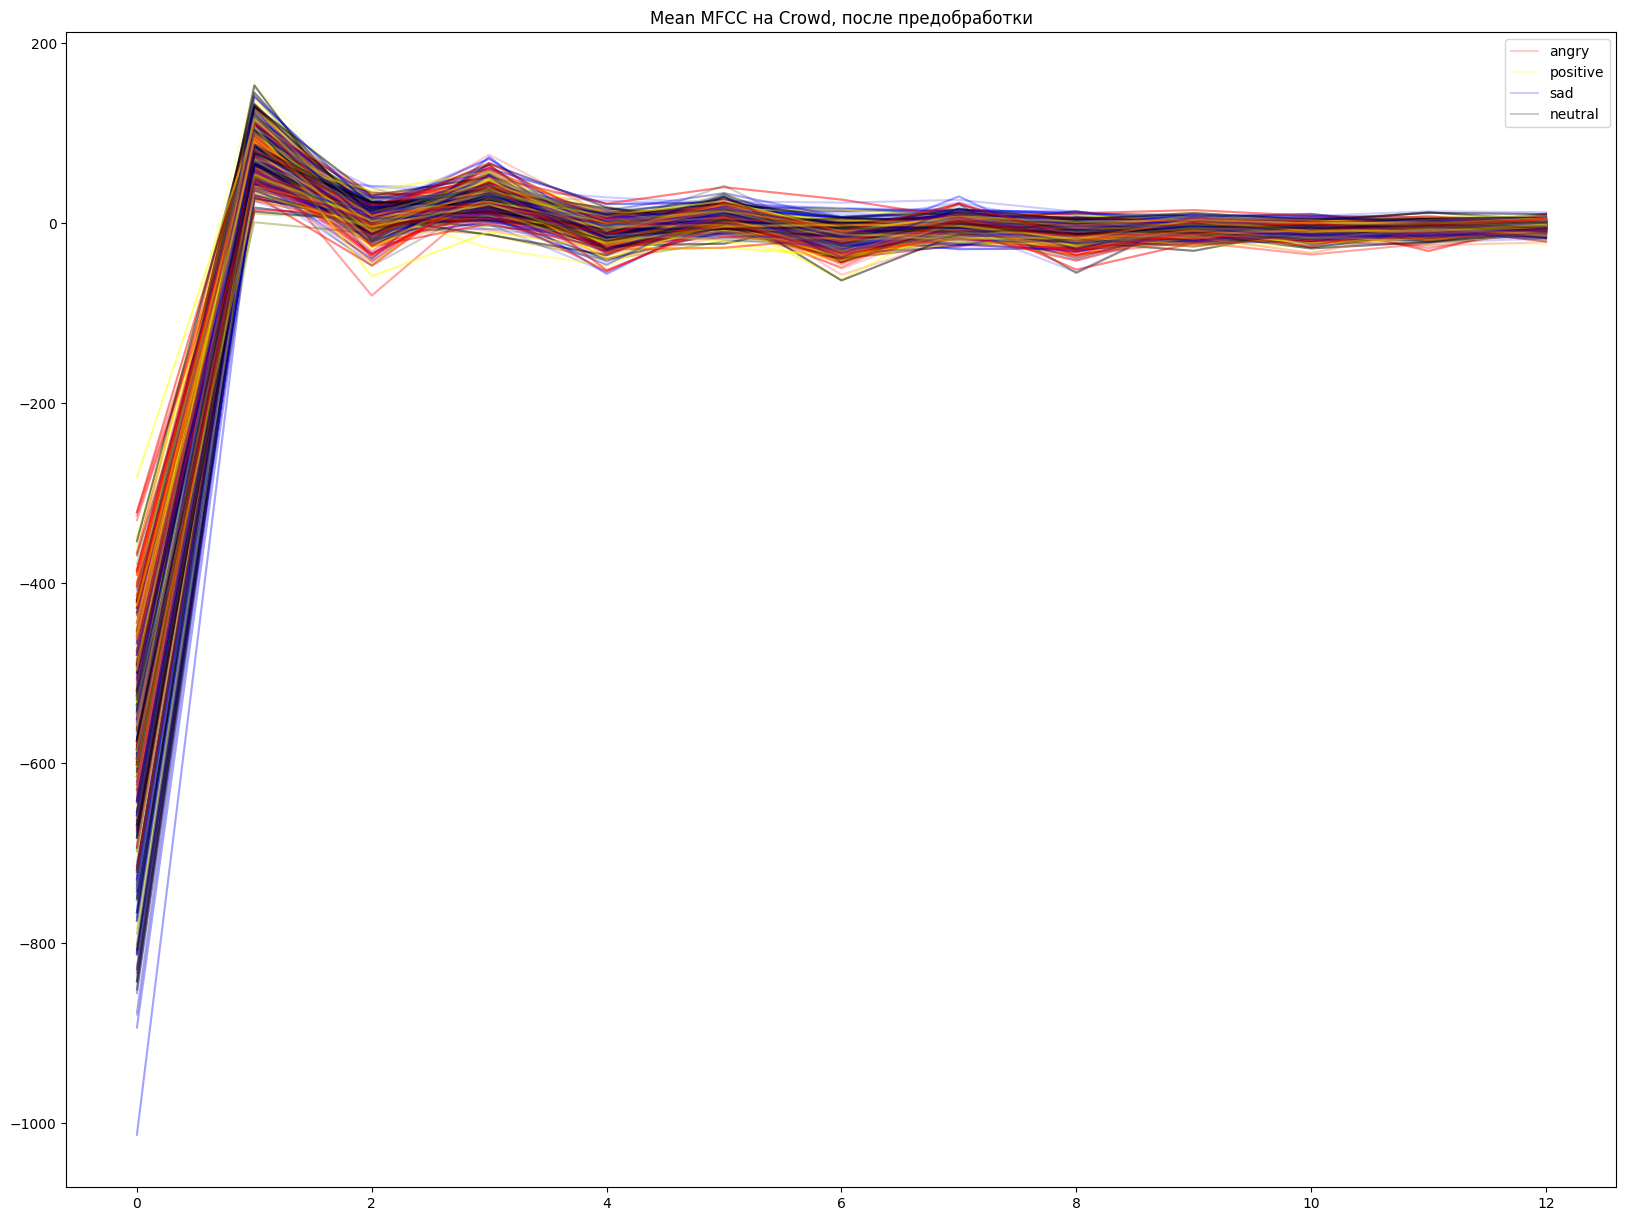

In [ ]:
plt.figure(figsize=(20, 15))
colors = ['', 'black', 'yellow', 'blue', '', 'red']
for i in range(200):
    for emo in ['angry', 'positive', 'sad', 'neutral']:
        path = crowd_train[crowd_train['annotator_emo'] == emo]['audio_path'].iloc[i]
        data, sr = librosa.load(path)
        data = nr.reduce_noise(data, sr=sr)
        data, index = librosa.effects.trim(data, top_db=33)
        mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, hop_length = 512, n_mfcc=13), axis=1)
        if i==0:
            plt.plot(mfcc, color=colors[len(emo)%6], alpha=0.2, label=emo)
        else:
            plt.plot(mfcc, color=colors[len(emo)%6], alpha=0.2)
plt.legend()
plt.title('Mean MFCC на Crowd, после предобработки')

## **2. Решить задачу классификации классическими методами машинного обучения.**

Делаем "балансировку" классов, отбирая определнное кол-во данных и создаем train и test датасеты, соединяя crowd и podcast

In [ ]:
class_1 = crowd_train[crowd_train['annotator_emo'] == 'angry'].sample(10000, random_state = 42)
class_2 = crowd_train[crowd_train['annotator_emo'] == 'sad'].sample(10000, random_state = 42)
class_3 = crowd_train[crowd_train['annotator_emo'] == 'positive'].sample(10000, random_state = 42)
class_4 = crowd_train[crowd_train['annotator_emo'] == 'neutral'].sample(10000, random_state = 42)

In [ ]:
class_5 = podcast_train[podcast_train['annotator_emo'] == 'angry'].sample(5000, random_state = 42)
class_6 = podcast_train[podcast_train['annotator_emo'] == 'sad'].sample(5000, random_state = 42)
class_7 = podcast_train[podcast_train['annotator_emo'] == 'positive'].sample(5000, random_state = 42)
class_8 = podcast_train[podcast_train['annotator_emo'] == 'neutral'].sample(5000, random_state = 42)

In [ ]:
train = pd.concat([class_1, class_2, class_3, class_4, class_5, class_6, class_7, class_8])

In [ ]:
class_11 = crowd_test[crowd_test['annotator_emo'] == 'angry'].sample(3000, random_state = 42)
class_22= crowd_test[crowd_test['annotator_emo'] == 'sad'].sample(3000, random_state = 42)
class_33 = crowd_test[crowd_test['annotator_emo'] == 'positive'].sample(3000, random_state = 42)
class_44 = crowd_test[crowd_test['annotator_emo'] == 'neutral'].sample(3000, random_state = 42)

In [ ]:
class_55 = podcast_test[podcast_test['annotator_emo'] == 'angry'].sample(1000, random_state = 42)
class_66 = podcast_test[podcast_test['annotator_emo'] == 'sad'].sample(1000, random_state = 42)
class_77 = podcast_test[podcast_test['annotator_emo'] == 'positive'].sample(1000, random_state = 42)
class_88 = podcast_test[podcast_test['annotator_emo'] == 'neutral'].sample(1000, random_state = 42)

In [ ]:
test = pd.concat([class_11, class_22, class_33, class_44, class_55, class_66, class_77, class_88])

In [ ]:
train.to_csv('train_lab6.csv', index = False)
test.to_csv('test_lab6.csv', index = False)

**Разделяем данные на входные данные и целевые переменные.**

X - текст аудио

y - эмоция

для этого отчистим данные от нулевых значений.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train_lab6.csv')
test = pd.read_csv('/content/drive/MyDrive/test_lab6.csv')

In [ ]:
train = train.dropna(subset=['speaker_text'])
test = test.dropna(subset=['speaker_text'])

In [ ]:
X_train, y_train, X_test, y_test = train['speaker_text'], train['annotator_emo'], test['speaker_text'], test['annotator_emo']

### **Я выбрала 5 классических методов:**

1. Логистическая регрессия
2. Метод опорных векторов
3. Случайный лес
4. Ближайший сосед
5. Дерево решений

In [ ]:
unique_classes = pd.unique(y_train)


Logistic Regression:

Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

       angry       0.76      0.67      0.71      3000
     neutral       0.37      0.48      0.41      2980
    positive       0.66      0.56      0.60      3000
         sad       0.37      0.36      0.36      2851

    accuracy                           0.52     11831
   macro avg       0.54      0.52      0.52     11831
weighted avg       0.54      0.52      0.53     11831



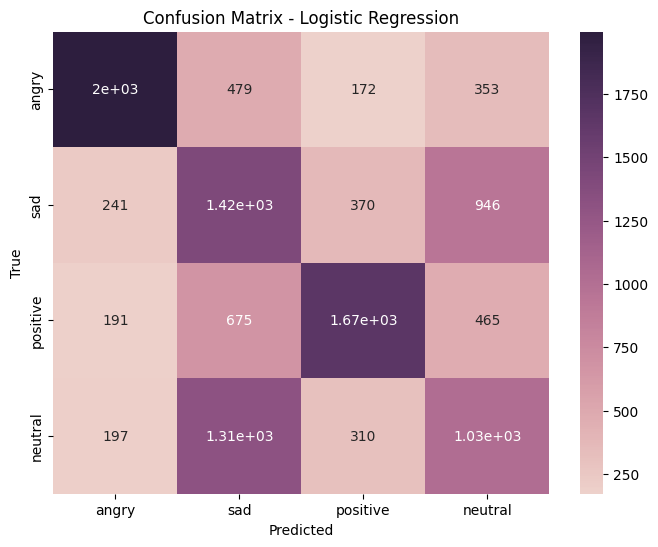


SVM:

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

       angry       0.74      0.68      0.71      3000
     neutral       0.36      0.49      0.42      2980
    positive       0.66      0.54      0.60      3000
         sad       0.37      0.33      0.35      2851

    accuracy                           0.51     11831
   macro avg       0.53      0.51      0.52     11831
weighted avg       0.54      0.51      0.52     11831



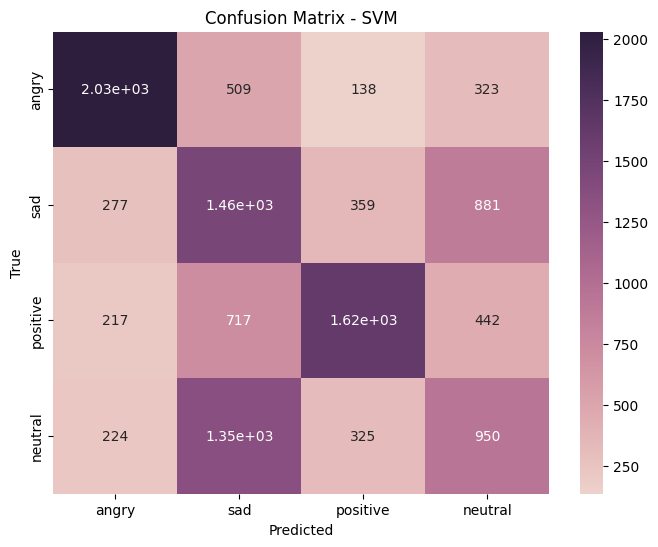


Random Forest:

Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

       angry       0.73      0.65      0.69      3000
     neutral       0.36      0.45      0.40      2980
    positive       0.54      0.56      0.55      3000
         sad       0.34      0.28      0.31      2851

    accuracy                           0.49     11831
   macro avg       0.49      0.48      0.49     11831
weighted avg       0.49      0.49      0.49     11831



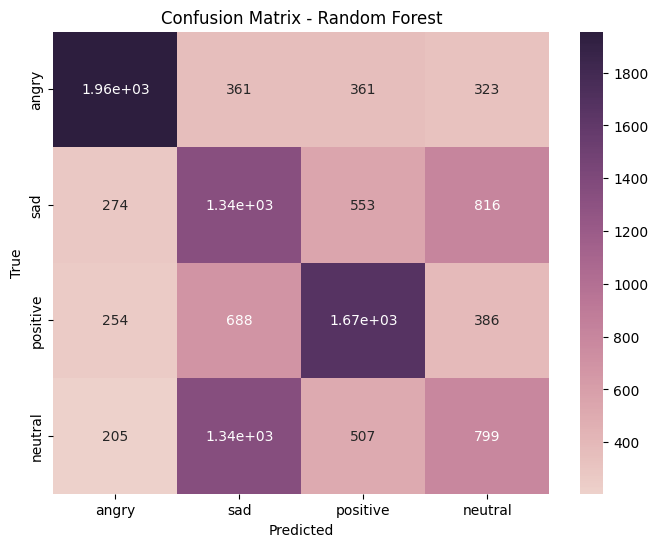


K-Nearest Neighbors:

Accuracy: 0.44

Classification Report:
               precision    recall  f1-score   support

       angry       0.68      0.52      0.59      3000
     neutral       0.33      0.50      0.40      2980
    positive       0.45      0.50      0.48      3000
         sad       0.35      0.22      0.27      2851

    accuracy                           0.44     11831
   macro avg       0.46      0.44      0.43     11831
weighted avg       0.46      0.44      0.44     11831



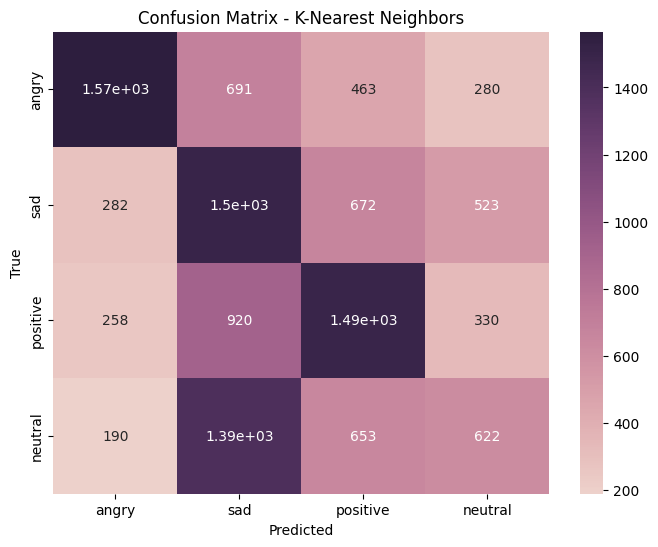


Decision Tree Classifier:

Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

       angry       0.67      0.60      0.63      3000
     neutral       0.35      0.41      0.38      2980
    positive       0.48      0.52      0.50      3000
         sad       0.32      0.27      0.29      2851

    accuracy                           0.45     11831
   macro avg       0.46      0.45      0.45     11831
weighted avg       0.46      0.45      0.45     11831



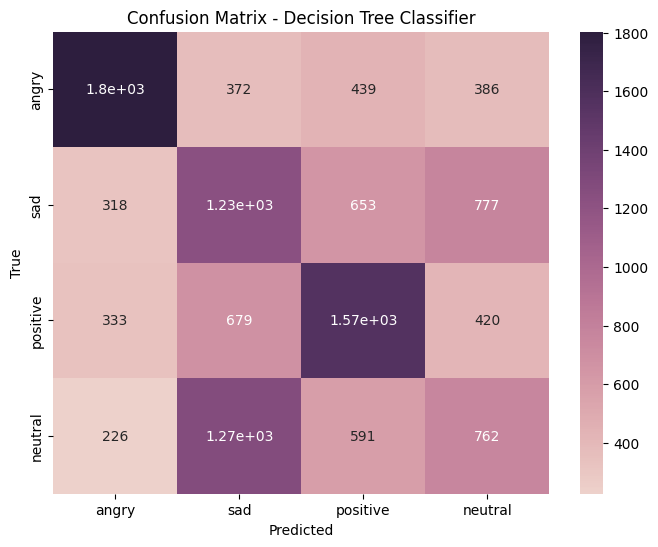

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}


for name, classifier in classifiers.items():
    model = Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('classifier', classifier)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f'\n{name}:\n')
    print(f'Accuracy: {accuracy:.2f}\n')
    print('Classification Report:\n', report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='.3g', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=unique_classes, yticklabels=unique_classes)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## **ВЫВОДЫ ПО 2 ЗАДАНИЮ:**

Средняя оценка точности на всех классических методах 0.5

Это не самый хороший результат. Возможно это из-за недостаточного кол-ва данных и настройки гиперпараметров. Можно обработать эти моменты, но всвязи с невысокими вычислительными ресурсами, лучше не рисковать.

### **3. Решить задачу классификации, использовав различные архитектуры нейронных сетей, включая HuBERT.**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**HuBERT**

In [ ]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-large-ls960-ft")
model = HubertForSequenceClassification.from_pretrained("xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned")
num2emotion = {0: 'neutral', 1: 'angry', 2: 'positive', 3: 'sad', 4: 'other'}

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_v', 'hubert.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametri

In [ ]:
model.to(device)

In [ ]:
filepath = "/content/crowd_train/wavs/01309aceee2c76c377e4c3ce30ad9e3c.wav"


waveform, sample_rate = torchaudio.load(filepath, normalize=True)
transform = torchaudio.transforms.Resample(sample_rate, 16000)
waveform = transform(waveform)

inputs = feature_extractor(
        waveform,
        sampling_rate=feature_extractor.sampling_rate,
        return_tensors="pt",
        padding=True,
        max_length=16000 * 10,
        truncation=True
    )

logits = model(inputs['input_values'][0]).logits
predictions = torch.argmax(logits, dim=-1)
predicted_emotion = num2emotion[predictions.numpy()[0]]
print("Настоящая эмоция: angry")
print("Предсказанная эмоция:", predicted_emotion)
Audio(filepath)

Настоящая эмоция: angry
Предсказанная эмоция: angry


In [ ]:
filepath = "/content/crowd_train/wavs/010aaed0f9197ec39fc89a59aa76c5cb.wav"


waveform, sample_rate = torchaudio.load(filepath, normalize=True)
transform = torchaudio.transforms.Resample(sample_rate, 16000)
waveform = transform(waveform)

inputs = feature_extractor(
        waveform,
        sampling_rate=feature_extractor.sampling_rate,
        return_tensors="pt",
        padding=True,
        max_length=16000 * 10,
        truncation=True
    )

logits = model(inputs['input_values'][0]).logits
predictions = torch.argmax(logits, dim=-1)
predicted_emotion = num2emotion[predictions.numpy()[0]]
print("Настоящая эмоция: neutral")
print("Предсказанная эмоция:", predicted_emotion)
Audio(filepath)

Настоящая эмоция: neutral
Предсказанная эмоция: neutral


### Я просмотрела около 5-7 записей и каждую эмоцию модель правильно определила, поэтому могу сделать вывод о том, что модель HuBERT отлично справляется с такой задачей.

**CNN-LSTM**


In [ ]:
all_data = pd.concat([train, test])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_data['speaker_text'])
X_all_seq = tokenizer.texts_to_sequences(all_data['speaker_text'])
X_all_padded = pad_sequences(X_all_seq)

X_train_padded = X_all_padded[:len(train)]
X_test_padded = X_all_padded[len(train):]

label_encoder = LabelEncoder()
all_data['label_encoded'] = label_encoder.fit_transform(all_data['annotator_emo'])
y_encoded = to_categorical(all_data['label_encoded'])

y_train_encoded = y_encoded[:len(train)]
y_test_encoded = y_encoded[len(train):]

X_train_padded = np.expand_dims(X_train_padded, axis=-1)
X_test_padded = np.expand_dims(X_test_padded, axis=-1)

In [ ]:
model = Sequential([
    BatchNormalization(input_shape=(X_train_padded.shape[1], X_train_padded.shape[2])),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    LSTM(128, return_sequences=True),
    LSTM(128),

    Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint('cnn_lstm_best_model_mfcc.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)

n_epochs = 30
history = model.fit(X_train_padded, y_train_encoded, batch_size=128, epochs=n_epochs,
                    validation_data=(X_test_padded, y_test_encoded), callbacks=[rlrp, checkpoint])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 47, 1)             4         
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           (None, 45, 128)           512       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 22, 128)           0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 22, 128)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 256)           98560     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 10, 256)          

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


265/265 [==============================] - ETA: 0s - loss: 1.3561 - accuracy: 0.3049
Epoch 2: val_accuracy improved from 0.27901 to 0.30352, saving model to cnn_lstm_best_model_mfcc.h5
265/265 [==============================] - 99s 373ms/step - loss: 1.3561 - accuracy: 0.3049 - val_loss: 1.3659 - val_accuracy: 0.3035 - lr: 0.0010
Epoch 3/30
265/265 [==============================] - ETA: 0s - loss: 1.3537 - accuracy: 0.3043
Epoch 3: val_accuracy did not improve from 0.30352
265/265 [==============================] - 107s 403ms/step - loss: 1.3537 - accuracy: 0.3043 - val_loss: 1.3723 - val_accuracy: 0.3004 - lr: 0.0010
Epoch 4/30
265/265 [==============================] - ETA: 0s - loss: 1.3577 - accuracy: 0.3057
Epoch 4: val_accuracy improved from 0.30352 to 0.31147, saving model to cnn_lstm_best_model_mfcc.h5
265/265 [==============================] - 115s 432ms/step - loss: 1.3577 - accuracy: 0.3057 - val_loss: 1.3601 - val_accuracy: 0.3115 - lr: 0.0010
Epoch 5/30
265/265 [=========

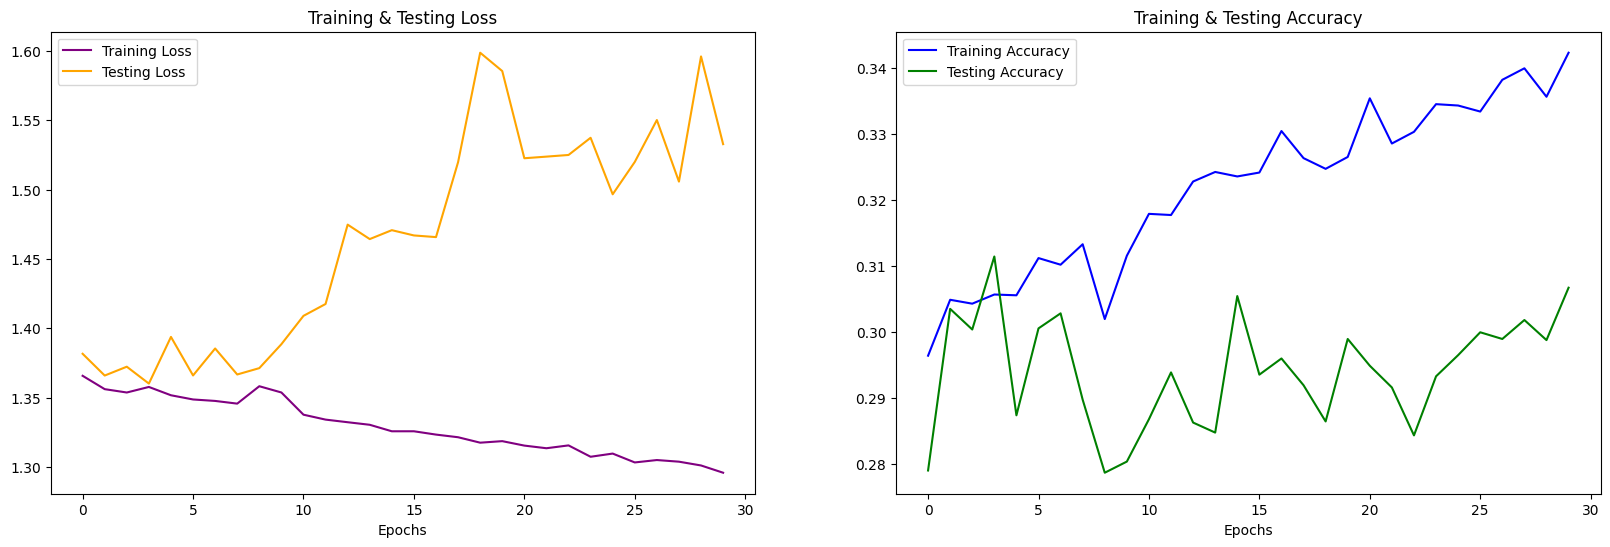

In [ ]:
epochs = [i for i in range(n_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss', color = 'purple')
ax[0].plot(epochs , test_loss , label = 'Testing Loss', color = 'orange')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy', color = 'blue')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy', color = 'green')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

370/370 [==============================] - 15s 35ms/step


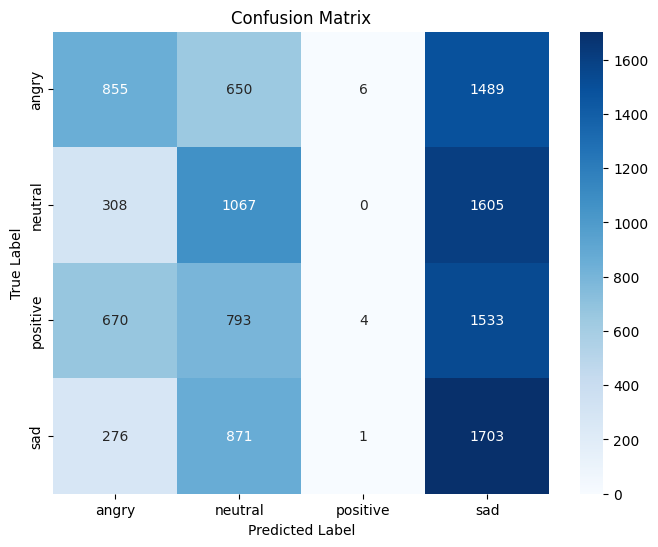

Classification Report:
               precision    recall  f1-score   support

       angry       0.41      0.28      0.33      3000
     neutral       0.32      0.36      0.34      2980
    positive       0.36      0.00      0.00      3000
         sad       0.27      0.60      0.37      2851

    accuracy                           0.31     11831
   macro avg       0.34      0.31      0.26     11831
weighted avg       0.34      0.31      0.26     11831



In [ ]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

class_report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

### **4. Разработать систему онлайн записи аудиофайлов и ее транскрибации с использованием Whisper (https://github.com/openai/whisper/)**

In [ ]:
!pip install whisper

In [ ]:
processor = WhisperProcessor.from_pretrained("openai/whisper-medium")

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-medium")
model.to(device)

In [ ]:
audio_paths = [
    "/content/drive/MyDrive/podcast/podcast_train/wavs/52db2f31857d333f92a13f2ff401e3b1.wav",
    "/content/drive/MyDrive/podcast/podcast_train/wavs/aa5ce4a263e19cbb0b4d9bbbe71b1def.wav",
    "/content/drive/MyDrive/podcast/podcast_train/wavs/70d6ee1476cc27ebeb94df60086ec389.wav",
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for audio_path in audio_paths:
    waveform, sample_rate = torchaudio.load(audio_path)
    print(f"Аудиофайл:")
    display(Audio(waveform.numpy(), rate=sample_rate))

    if waveform.size(0) > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    if sample_rate != 16000:
        waveform = torchaudio.transforms.Resample(
            orig_freq=sample_rate, new_freq=16000
        )(waveform)
        sample_rate = 16000

    inputs = processor(waveform.squeeze(), sampling_rate=sample_rate, return_tensors="pt")
    with torch.no_grad():
        outputs = model.generate(inputs["input_features"].to(device), task="transcribe")
    transcription = processor.batch_decode(outputs, skip_special_tokens=True)

    print(f"Текст: {transcription[0]}\n")

Аудиофайл:


Текст:  песенка-лисенка про ягоды на youtube

Аудиофайл:


Текст:  Первая серия про Рок Юсуф

Аудиофайл:


Текст:  Мне грустно без тебя.



### **5.	Примените ruBERT для анализа тональности текста**

In [ ]:
emmodel_name = "DeepPavlov/rubert-base-cased-conversational"
tokenizer = BertTokenizer.from_pretrained(emmodel_name)
emmodel = BertForSequenceClassification.from_pretrained(emmodel_name)
emmodel.to(device)

In [ ]:
audio_files = [
    "/content/drive/MyDrive/podcast/podcast_train/wavs/52db2f31857d333f92a13f2ff401e3b1.wav",
    "/content/drive/MyDrive/podcast/podcast_train/wavs/aa5ce4a263e19cbb0b4d9bbbe71b1def.wav",
    "/content/drive/MyDrive/podcast/podcast_train/wavs/70d6ee1476cc27ebeb94df60086ec389.wav",
]

texts = [
    "песенка-лисенка про ягоды на youtube",
    "Первая серия про Рок Юсуф",
    "Мне грустно без тебя.",
]
for i, (audio_path, text) in enumerate(zip(audio_files, texts)):
    print("\n" + "_"*50 + "\n")
    print(f"Аудио {i + 1} (текст: {text}):")

    waveform, sample_rate = torchaudio.load(audio_path)
    if waveform.size(0) > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    target_sample_rate = 16000
    if sample_rate != target_sample_rate:
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)(waveform)
        sample_rate = target_sample_rate

    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        logits = emmodel(**inputs).logits

    probabilities = torch.softmax(logits, dim=1).tolist()[0]

    predicted_class = torch.argmax(logits).item()

    emotion_labels = ['angry', 'sad', 'positive', 'neutral']
    if 0 <= predicted_class < len(emotion_labels):
        predicted_emotion = emotion_labels[predicted_class]
    else:
        predicted_emotion = "Неизвестно"

    print("Текст:", text)
    print("Предсказанная эмоция:", predicted_emotion)
    print("Вероятности для каждой тональности:", probabilities)

    Audio(waveform.numpy(), rate=16000)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



__________________________________________________

Аудио 1 (текст: песенка-лисенка про ягоды на youtube):
Текст: песенка-лисенка про ягоды на youtube
Предсказанная эмоция: sad
Вероятности для каждой тональности: [0.48604539036750793, 0.5139545798301697]

__________________________________________________

Аудио 2 (текст: Первая серия про Рок Юсуф):
Текст: Первая серия про Рок Юсуф
Предсказанная эмоция: angry
Вероятности для каждой тональности: [0.6238846182823181, 0.3761153221130371]

__________________________________________________

Аудио 3 (текст: Мне грустно без тебя.):
Текст: Мне грустно без тебя.
Предсказанная эмоция: angry
Вероятности для каждой тональности: [0.6245828866958618, 0.37541714310646057]
